In [40]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% load packages
pkg load statistics
% clear and warning off
clear
warning off
% end of housekeeping

# Species sensitivity distribution (SSD)

![SSD](SSD.jpg)

Species sensitivity distrubutions are used to help set guidelines for metals in aquatic environments.

https://entoxsimplified.com/2018/08/03/species-sensitivity-distribution/#comments

- different juristictions have different tolerances, and safety factors
- SSD can be modified to take into acount receiving water chemistry using the BLM

# Biotic Ligand Model (BLM)

![BLM](BLM.png)

BLM is used for risk assessment of metals in the environment.  It can even be used as part of "permit writing" (license to pollute).  

- three C's
- based on chemical equilibrium modelling
- all the types of reactions we talk about PLUS reaction at the biotic ligand (such as fish gill)
- toxicity proportional to accumulation at the biotic ligand
- replaces the free ion activity model (FIAM)
- "invented" at Laurier ! (Professor Rick Playle)
- need 7 water chemistry parameters (Na, Ca, K, Mg, Cl, Alk, DOC)


### reaction of metal at the biotic ligand

This is a simple metal-ligand complexation reaction.  For metal consider M$^{2+}$ and ligand BL$^-$.  Let's assume a binding capacity (BL$_T$) of 10 nM and a logK value of 7.5 for metal complexation at the BL.  Assume 50\% saturation of the binding site for 50\% toxicity (LA50).

LA50 does not change, but the LC50 does change.


LC50nM = 39.811


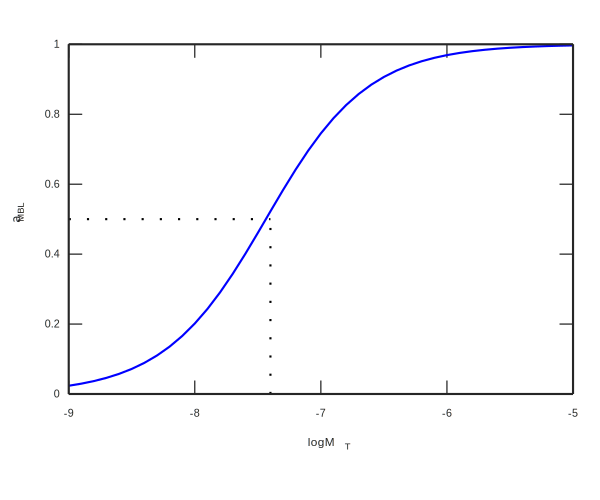

In [41]:
%plot -s 600,500 -f 'svg'
BLT=10e-9; logKf=7.5; logMT=-9:0.1:-5; MT=10.^logMT;

TABLEAU=[...
%M   BL  logK   species
1   0    0      {'M'}
0   1    0      {'BL'}
1   1    logKf  {'MBL'}
];

[N,M]=size(TABLEAU); ASOLUTION=cell2mat(TABLEAU(1:N,1:M-2)); KSOLUTION=cell2mat(TABLEAU(1:N,M-1));
SOLUTIONNAMES=strvcat(TABLEAU(1:N,M));

for i=1:length(MT)
    T=[MT(i); BLT];
    [X,F,J,SPECIESCONCS]=nl_massbalancerrnosolid_NR(T,ASOLUTION,KSOLUTION,T);
    check(i)=100*(max(F./T)); %worst case error in%
    % this will generate the outputs
    for k=1:size(SPECIESCONCS,1)
          txt=[SOLUTIONNAMES(k,:),'(i)=SPECIESCONCS(k);'];eval(txt)
    end
end

alpha=MBL./BLT; [value,index]=min(abs(0.5-alpha)); halfsat=logMT(index);
plot(logMT,MBL./BLT,'b-','linewidth',2)
set(gca,'linewidth',2); xlabel('logM_T'); ylabel('\alpha_{MBL}')
hold on
plot([halfsat halfsat],[0 0.5],'k:','linewidth',2)
plot([min(logMT) halfsat],[0.5 0.5],'k:','linewidth',2)

%log10(M(index)) half way sat logM=-logKf

LC50nM=(10^halfsat)*1e9

### add proton competition

protons can also bind at the biotic ligand.  If a proton binds then the metal can't bind so pH (lower) can be protective (toxicity modifying factor).  Of course low pH might have its own toxic effects, but for now we will ignore that.

so consider that the biotic ligand has a pKa value of 4.5. 

LA50 does not change, but the LC50 does change.


LC50nMpH4 = 125.89
LC50nMpH6 = 50.119
LC50nMpH8 = 39.811


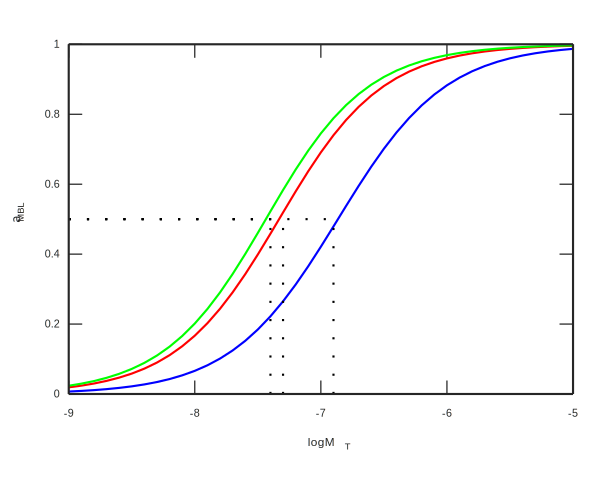

In [42]:
%plot -s 600,500 -f 'svg'
%BLT=10e-9; logKf=7.5; logMT=-9:0.01:-5; MT=10.^logMT;
pKa=4.5;

TABLEAU=[...
%H    M  BL  logK   species
1    0   0    0      {'H'}
0    1   0    0      {'M'}
0    0   1    0      {'BL'}
0    1   1    logKf  {'MBL'}
1    0   1    pKa    {'HBL'}
];

[N,M]=size(TABLEAU); ASOLUTION=cell2mat(TABLEAU(1:N,1:M-2)); KSOLUTION=cell2mat(TABLEAU(1:N,M-1));
SOLUTIONNAMES=strvcat(TABLEAU(1:N,M));
pH=4;
for i=1:length(MT)
    [N,M]=size(ASOLUTION); Ksolution=KSOLUTION-ASOLUTION(:,1)*pH; Asolution=[ASOLUTION(:,2:M)];
    T=[MT(i); BLT];
    [X,F,J,SPECIESCONCS]=nl_massbalancerrnosolid_NR(T,Asolution,Ksolution,T);
    check(i)=100*(max(F./T)); %worst case error in%
    % this will generate the outputs
    for k=1:size(SPECIESCONCS,1)
          txt=[SOLUTIONNAMES(k,:),'(i)=SPECIESCONCS(k);'];eval(txt)
    end
end

alpha=MBL./BLT; [value,index]=min(abs(0.5-alpha)); halfsat=logMT(index);
plot(logMT,MBL./BLT,'b-','linewidth',2)
set(gca,'linewidth',2); xlabel('logM_T'); ylabel('\alpha_{MBL}')
hold on
plot([halfsat halfsat],[0 0.5],'k:','linewidth',2)
plot([min(logMT) halfsat],[0.5 0.5],'k:','linewidth',2)
LC50nMpH4=(10^halfsat)*1e9

pH=5;
for i=1:length(MT)
    [N,M]=size(ASOLUTION); Ksolution=KSOLUTION-ASOLUTION(:,1)*pH; Asolution=[ASOLUTION(:,2:M)];
    T=[MT(i); BLT];
    [X,F,J,SPECIESCONCS]=nl_massbalancerrnosolid_NR(T,Asolution,Ksolution,T);
    check(i)=100*(max(F./T)); %worst case error in%
    % this will generate the outputs
    for k=1:size(SPECIESCONCS,1)
          txt=[SOLUTIONNAMES(k,:),'(i)=SPECIESCONCS(k);'];eval(txt)
    end
end

alpha=MBL./BLT; [value,index]=min(abs(0.5-alpha)); halfsat=logMT(index);
plot(logMT,MBL./BLT,'r-','linewidth',2)
set(gca,'linewidth',2); xlabel('logM_T'); ylabel('\alpha_{MBL}')
hold on
plot([halfsat halfsat],[0 0.5],'k:','linewidth',2)
plot([min(logMT) halfsat],[0.5 0.5],'k:','linewidth',2)
LC50nMpH6=(10^halfsat)*1e9

pH=8;
for i=1:length(MT)
    [N,M]=size(ASOLUTION); Ksolution=KSOLUTION-ASOLUTION(:,1)*pH; Asolution=[ASOLUTION(:,2:M)];
    T=[MT(i); BLT];
    [X,F,J,SPECIESCONCS]=nl_massbalancerrnosolid_NR(T,Asolution,Ksolution,T);
    check(i)=100*(max(F./T)); %worst case error in%
    % this will generate the outputs
    for k=1:size(SPECIESCONCS,1)
          txt=[SOLUTIONNAMES(k,:),'(i)=SPECIESCONCS(k);'];eval(txt)
    end
end

alpha=MBL./BLT; [value,index]=min(abs(0.5-alpha)); halfsat=logMT(index);
plot(logMT,MBL./BLT,'g-','linewidth',2)
set(gca,'linewidth',2); xlabel('logM_T'); ylabel('\alpha_{MBL}')
hold on
plot([halfsat halfsat],[0 0.5],'k:','linewidth',2)
plot([min(logMT) halfsat],[0.5 0.5],'k:','linewidth',2)
LC50nMpH8=(10^halfsat)*1e9

### add strong base cation competition

other cations, Na$^+$, K$^+$, Mg$^{2+}$, Ca$^{2+}$, are typically non-toxic and can bind to the biotic ligand site, and prevent toxic metals from binding.

so consider that the biotic ligand has a logKf value of 2.5 for Ca$^{2+}$ binding.  Let's simulate a high and a low calcium situation.

Again, LA50 does not change, but the LC50 does change.


LC50nMpH7Calow = 39.811
LC50nMpH7Cahigh = 125.89


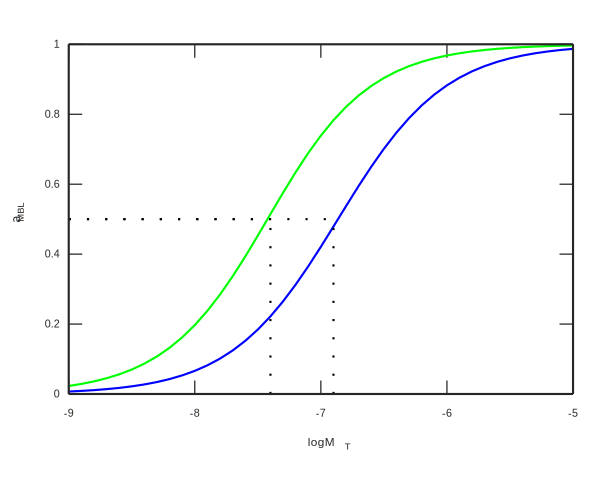

In [43]:
%plot -s 600,500 -f 'svg'
%BLT=10e-9; logKf=7.5; logMT=-9:0.01:-5; MT=10.^logMT;%pKa=4.5;
logKfCa=2.5;

TABLEAU=[...
%H   M  BL   Ca  logK        species
1    0   0   0    0          {'H'}
0    1   0   0    0          {'M'}
0    0   1   0    0          {'BL'}
0    0   0   1    0          {'Ca'}
0    1   1   0    logKf      {'MBL'}
1    0   1   0    pKa        {'HBL'}
0    0   1   1    logKfCa    {'CaBL'}
];

[N,M]=size(TABLEAU); ASOLUTION=cell2mat(TABLEAU(1:N,1:M-2)); KSOLUTION=cell2mat(TABLEAU(1:N,M-1));
SOLUTIONNAMES=strvcat(TABLEAU(1:N,M));
pH=7; CaT=1e-4;
for i=1:length(MT)
    [N,M]=size(ASOLUTION); Ksolution=KSOLUTION-ASOLUTION(:,1)*pH; Asolution=[ASOLUTION(:,2:M)];
    T=[MT(i); BLT; CaT];
    [X,F,J,SPECIESCONCS]=nl_massbalancerrnosolid_NR(T./10,Asolution,Ksolution,T);
    check(i)=100*(max(F./T)); %worst case error in%
    % this will generate the outputs
    for k=1:size(SPECIESCONCS,1)
          txt=[SOLUTIONNAMES(k,:),'(i)=SPECIESCONCS(k);'];eval(txt)
    end
end

alpha=MBL./BLT; [value,index]=min(abs(0.5-alpha)); halfsat=logMT(index);
plot(logMT,MBL./BLT,'g-','linewidth',2)
set(gca,'linewidth',2); xlabel('logM_T'); ylabel('\alpha_{MBL}')
hold on
plot([halfsat halfsat],[0 0.5],'k:','linewidth',2)
plot([min(logMT) halfsat],[0.5 0.5],'k:','linewidth',2)
LC50nMpH7Calow=(10^halfsat)*1e9

pH=7; CaT=1e-2;
for i=1:length(MT)
    [N,M]=size(ASOLUTION); Ksolution=KSOLUTION-ASOLUTION(:,1)*pH; Asolution=[ASOLUTION(:,2:M)];
    T=[MT(i); BLT; CaT];
    [X,F,J,SPECIESCONCS]=nl_massbalancerrnosolid_NR(T./10,Asolution,Ksolution,T);
    check(i)=100*(max(F./T)); %worst case error in%
    % this will generate the outputs
    for k=1:size(SPECIESCONCS,1)
          txt=[SOLUTIONNAMES(k,:),'(i)=SPECIESCONCS(k);'];eval(txt)
    end
end

alpha=MBL./BLT; [value,index]=min(abs(0.5-alpha)); halfsat=logMT(index);
plot(logMT,MBL./BLT,'b-','linewidth',2)
set(gca,'linewidth',2); xlabel('logM_T'); ylabel('\alpha_{MBL}')
hold on
plot([halfsat halfsat],[0 0.5],'k:','linewidth',2)
plot([min(logMT) halfsat],[0.5 0.5],'k:','linewidth',2)
LC50nMpH7Cahigh=(10^halfsat)*1e9


### add NOM complexation

other anions can bind the toxic metal and reduce accumulation at the biotic ligand.  Hydroxo, chloro, carbonato complexation for example.  And also natural organic matter complexation. Organic matter also will bind other cations, as well as protons.

So let's add in chloro complexation and NOM.  Also, add in metal hydrolysis (MOH formation).


LC50nMpH7CalowClTlowNOM = 79.433
LC50nMpH7CalowClThighNOM = 398.11


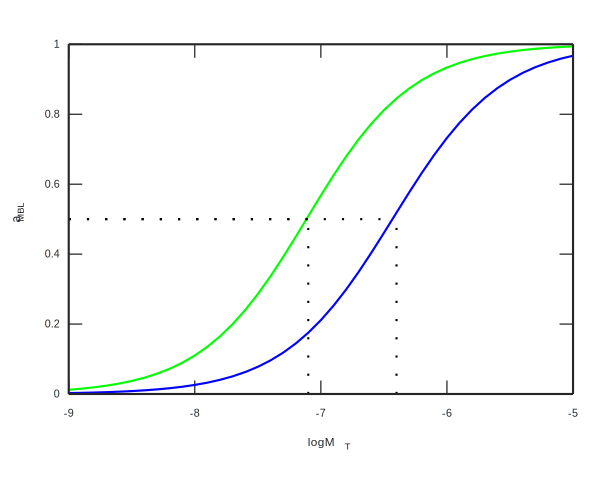

In [44]:
%plot -s 600,500 -f 'svg'
%BLT=10e-9; logKf=7.5; logMT=-9:0.01:-5; MT=10.^logMT;%pKa=4.5;%logKfCa=2.5;

TABLEAU=[...
%H   M  BL   Ca  Cl  NOM   logK        species
1    0   0   0   0    0     0          {'H'}
0    1   0   0   0    0     0          {'M'}
0    0   1   0   0    0     0          {'BL'}
0    0   0   1   0    0     0          {'Ca'}
0    0   0   0   1    0     0          {'Cl'}
0    0   0   0   0    1     0          {'NOM'}
0    1   1   0   0    0     logKf      {'MBL'}
1    0   1   0   0    0     pKa        {'HBL'}
0    0   1   1   0    0     logKfCa    {'CaBL'}
0    1   0   0   1    0     3          {'MCl'}
-1   1   0   0   0    0     -8         {'MOH'}
1    0   0   0   0    1     10         {'HNOM'}
2    0   0   0   0    1     14         {'H2NOM'}
0    1   0   0   0    1     8          {'MNOM'}
0    0   0   1   0    1     3.5        {'CaNOM'}
];

[N,M]=size(TABLEAU); ASOLUTION=cell2mat(TABLEAU(1:N,1:M-2)); KSOLUTION=cell2mat(TABLEAU(1:N,M-1));
SOLUTIONNAMES=strvcat(TABLEAU(1:N,M));
pH=7; CaT=1e-4; ClT=1e-4; NOMT=10e-6;
for i=1:length(MT)
    [N,M]=size(ASOLUTION); Ksolution=KSOLUTION-ASOLUTION(:,1)*pH; Asolution=[ASOLUTION(:,2:M)];
    T=[MT(i); BLT; CaT; ClT; NOMT];
    [X,F,J,SPECIESCONCS]=nl_massbalancerrnosolid_NR(T./10,Asolution,Ksolution,T);
    check(i)=100*(max(F./T)); %worst case error in%
    % this will generate the outputs
    for k=1:size(SPECIESCONCS,1)
          txt=[SOLUTIONNAMES(k,:),'(i)=SPECIESCONCS(k);'];eval(txt)
    end
end

alpha=MBL./BLT; [value,index]=min(abs(0.5-alpha)); halfsat=logMT(index);
plot(logMT,MBL./BLT,'g-','linewidth',2)
set(gca,'linewidth',2); xlabel('logM_T'); ylabel('\alpha_{MBL}')
hold on
plot([halfsat halfsat],[0 0.5],'k:','linewidth',2)
plot([min(logMT) halfsat],[0.5 0.5],'k:','linewidth',2)
LC50nMpH7CalowClTlowNOM=(10^halfsat)*1e9

pH=7; CaT=1e-4; ClT=1e-4; NOMT=100e-6;
for i=1:length(MT)
    [N,M]=size(ASOLUTION); Ksolution=KSOLUTION-ASOLUTION(:,1)*pH; Asolution=[ASOLUTION(:,2:M)];
    T=[MT(i); BLT; CaT; ClT; NOMT];
    [X,F,J,SPECIESCONCS]=nl_massbalancerrnosolid_NR(T./10,Asolution,Ksolution,T);
    check(i)=100*(max(F./T)); %worst case error in%
    % this will generate the outputs
    for k=1:size(SPECIESCONCS,1)
          txt=[SOLUTIONNAMES(k,:),'(i)=SPECIESCONCS(k);'];eval(txt)
    end
end

alpha=MBL./BLT; [value,index]=min(abs(0.5-alpha)); halfsat=logMT(index);
plot(logMT,MBL./BLT,'b-','linewidth',2)
set(gca,'linewidth',2); xlabel('logM_T'); ylabel('\alpha_{MBL}')
hold on
plot([halfsat halfsat],[0 0.5],'k:','linewidth',2)
plot([min(logMT) halfsat],[0.5 0.5],'k:','linewidth',2)
LC50nMpH7CalowClThighNOM=(10^halfsat)*1e9
